In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [53]:
data = pd.read_csv('Amostras.csv')

In [54]:
data.keys()

Index(['Amostra', 'x1', 'x2', 'x3'], dtype='object')

In [55]:
data

,Amostra,x1,x2,x3
0,1,-7.82,-4.58,-3.97
1,2,-6.68,3.16,2.71
2,3,4.36,-2.19,2.09
3,4,6.72,0.88,2.80
4,5,-8.64,3.06,3.50
5,6,-6.87,0.57,-5.45
6,7,4.47,-2.62,5.76
7,8,6.73,-2.01,4.18
8,9,-7.71,2.34,-6.33
9,10,-6.91,-0.49,-5.68


In [56]:
data1 = data.iloc[:,1:].values 
print(data1)

[[-7.82 -4.58 -3.97]
 [-6.68  3.16  2.71]
 [ 4.36 -2.19  2.09]
 [ 6.72  0.88  2.8 ]
 [-8.64  3.06  3.5 ]
 [-6.87  0.57 -5.45]
 [ 4.47 -2.62  5.76]
 [ 6.73 -2.01  4.18]
 [-7.71  2.34 -6.33]
 [-6.91 -0.49 -5.68]
 [ 6.18  2.81  5.82]
 [ 6.72 -0.93 -4.04]
 [-6.25 -0.26  0.56]
 [-6.94 -1.22  1.13]
 [ 8.09  0.2   2.25]
 [ 6.81  0.17 -4.15]
 [-5.19  4.24  4.04]
 [-6.38 -1.74  1.43]
 [ 4.08  1.3   5.33]
 [ 6.27  0.93 -2.78]]


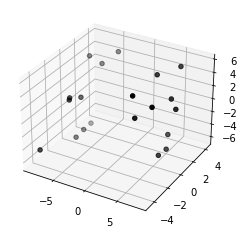

In [57]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data1[:,0],data1[:,1],data1[:,2],color='k') 
plt.show()

# **Clustering**

## (a) **Considere que existam três clusters e a inicialização dos centros seja aleatória**

In [64]:
# Treino

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data1)

print("Número de interações = ",kmeans.n_iter_)

Número de interações =  2


In [65]:
kmeans.cluster_centers_

array([[ 6.043     , -0.146     ,  1.726     ],
       [-7.3275    , -0.54      , -5.3575    ],
       [-6.68      ,  1.20666667,  2.22833333]])

In [66]:
distance = kmeans.fit_transform(data1)
distance

array([[15.6297006 ,  4.29992006,  8.55595975],
       [13.18228436,  8.89909054,  2.01184341],
       [ 2.67262437, 13.95655446, 11.55154018],
       [ 1.6323238 , 16.30623999, 13.41616614],
       [15.13327463,  9.65080113,  2.98221068],
       [14.79030767,  1.20414389,  7.70702584],
       [ 4.98679867, 16.34338436, 12.30603702],
       [ 3.15730597, 17.05104432, 13.92781559],
       [16.13147052,  3.06373343,  8.69427478],
       [14.92472382,  0.52991745,  8.09155819],
       [ 5.05148899, 17.84969362, 13.4480611 ],
       [ 5.8583053 , 14.11453728, 14.94715181],
       [12.34870038,  6.02131319,  2.26259745],
       [13.04097316,  6.53453996,  2.67631224],
       [ 2.14114479, 17.20816558, 14.80428138],
       [ 5.93426668, 14.20672596, 14.9578713 ],
       [12.27892019, 10.7578024 ,  3.83449439],
       [12.52834311,  6.9575795 ,  3.06760176],
       [ 4.35121834, 15.73973674, 11.19851094],
       [ 4.63824762, 13.91748585, 13.88749247]])

In [67]:
# Teste

y_kmeans = kmeans.predict(data1)
print(y_kmeans)

[1 2 0 0 2 1 0 0 1 1 0 0 2 2 0 0 2 2 0 0]


/tmp/ipykernel_6034/4285397430.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(data['x1'],data['x2'],data['x3'],c=y_kmeans.astype(np.float))


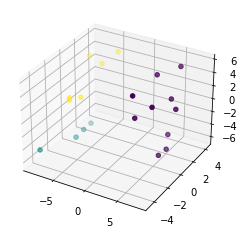

In [68]:
colormap = {1: 'r', 2: 'g', 3: 'b'}
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['x1'],data['x2'],data['x3'],
           c=y_kmeans.astype(np.float)) 
plt.show()

## (b) **Considere que existam três clusters e a inicialização dos centros seja dada por m1 =(0,0,0) t , m 2 =(1,1,1) t , m 3 =(-1,0,2) t.**

In [41]:
# Treino

from sklearn.cluster import KMeans

X = np.array([[0,0,0],
              [1,1,1],
              [-1,0,2]], np.float64)

kmeans = KMeans(n_clusters=3, init=X, n_init=1).fit(data1)

print("Número de interações = ",kmeans.n_iter_)

Número de interações =  2


In [42]:
kmeans.cluster_centers_

array([[-7.3275    , -0.54      , -5.3575    ],
       [ 6.043     , -0.146     ,  1.726     ],
       [-6.68      ,  1.20666667,  2.22833333]])

In [43]:
distance = kmeans.fit_transform(data1)
distance

array([[ 4.29992006, 15.6297006 ,  8.55595975],
       [ 8.89909054, 13.18228436,  2.01184341],
       [13.95655446,  2.67262437, 11.55154018],
       [16.30623999,  1.6323238 , 13.41616614],
       [ 9.65080113, 15.13327463,  2.98221068],
       [ 1.20414389, 14.79030767,  7.70702584],
       [16.34338436,  4.98679867, 12.30603702],
       [17.05104432,  3.15730597, 13.92781559],
       [ 3.06373343, 16.13147052,  8.69427478],
       [ 0.52991745, 14.92472382,  8.09155819],
       [17.84969362,  5.05148899, 13.4480611 ],
       [14.11453728,  5.8583053 , 14.94715181],
       [ 6.02131319, 12.34870038,  2.26259745],
       [ 6.53453996, 13.04097316,  2.67631224],
       [17.20816558,  2.14114479, 14.80428138],
       [14.20672596,  5.93426668, 14.9578713 ],
       [10.7578024 , 12.27892019,  3.83449439],
       [ 6.9575795 , 12.52834311,  3.06760176],
       [15.73973674,  4.35121834, 11.19851094],
       [13.91748585,  4.63824762, 13.88749247]])

In [44]:
# Teste

y_kmeans = kmeans.predict(data1)
print(y_kmeans)

[0 2 1 1 2 0 1 1 0 0 1 1 2 2 1 1 2 2 1 1]


/tmp/ipykernel_6034/4285397430.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(data['x1'],data['x2'],data['x3'],c=y_kmeans.astype(np.float))


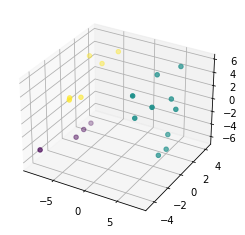

In [45]:
colormap = {1: 'r', 2: 'g', 3: 'b'}
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['x1'],data['x2'],data['x3'],
           c=y_kmeans.astype(np.float)) 
plt.show()

## (c) **Repita o item a considerando que os centros iniciais sejam m 1 =(-0.1,0,0.1) t , m 2 =(0,-0.1,0.1) t , m 3 =(-0.1,-0.1,0.1) t . Compare o resultado obtido com o item (a) e explique a razão da diferenças, incluindo o número de interações para alcançar a convergência.**

In [69]:
# Treino

from sklearn.cluster import KMeans

X = np.array([[-0.1,0,0.1],
              [0,-0.1,0.1],
              [-0.1,-0.1,0.1]], np.float64)

kmeans = KMeans(n_clusters=3, init=X, n_init=1).fit(data1)

print("Número de interações = ",kmeans.n_iter_)

Número de interações =  4


In [70]:
kmeans.cluster_centers_

array([[-6.83666667,  3.48666667,  3.41666667],
       [ 6.043     , -0.146     ,  1.726     ],
       [-6.98285714, -0.76857143, -2.61571429]])

In [71]:
distance = kmeans.fit_transform(data1)
distance

array([[10.98184411, 15.6297006 ,  4.13060355],
       [ 0.79412426, 13.18228436,  6.62484932],
       [12.62338835,  2.67262437, 12.3622253 ],
       [13.81876261,  1.6323238 , 14.82619448],
       [ 1.85499326, 15.13327463,  7.40311035],
       [ 9.33412199, 14.79030767,  3.13650852],
       [13.0622854 ,  4.98679867, 14.30902912],
       [14.65777837,  3.15730597, 15.35465169],
       [ 9.852668  , 16.13147052,  4.89774146],
       [ 9.92817204, 14.92472382,  3.07778445],
       [13.25396167,  5.05148899, 16.03833711],
       [16.09012223,  5.8583053 , 13.77762472],
       [ 4.74786619, 12.34870038,  3.29861876],
       [ 5.23375901, 13.04097316,  3.77306242],
       [15.3286877 ,  2.14114479, 15.8683436 ],
       [15.95262465,  5.93426668, 13.90963181],
       [ 1.91508921, 12.27892019,  8.52048456],
       [ 5.61011883, 12.52834311,  4.20415441],
       [11.29672371,  4.35121834, 13.7767983 ],
       [14.72141071,  4.63824762, 13.36227365]])

In [72]:
# Teste

y_kmeans = kmeans.predict(data1)
print(y_kmeans)

[2 0 1 1 0 2 1 1 2 2 1 1 2 2 1 1 0 2 1 1]


/tmp/ipykernel_6034/4285397430.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(data['x1'],data['x2'],data['x3'],c=y_kmeans.astype(np.float))


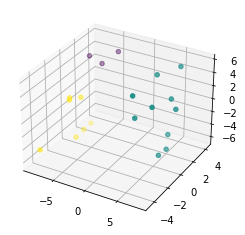

In [73]:
colormap = {1: 'r', 2: 'g', 3: 'b'}
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['x1'],data['x2'],data['x3'],
           c=y_kmeans.astype(np.float)) 
plt.show()